# MACHINE LEARNING ques 2

Q2.Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.

Dataset This is the Dataset You can use this dataset for this question.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
%matplotlib inline

## Reading Data set 

In [3]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Understanding the Data

In [5]:
df.info

<bound method DataFrame.info of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FA

In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [10]:
df.shape

(2111, 17)

In [11]:
# Convert object/text variables to category variables
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [12]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:    
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [13]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')  
    
# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [14]:
df.dtypes

Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                                 int32
NCP                                  int32
CAEC                              category
SMOKE                             category
CH2O                                 int32
SCC                               category
FAF                                  int32
TUE                                  int32
CALC                              category
MTRANS                            category
NObeyesdad                        category
dtype: object

C:\Users\kundan Gupta\AppData\Local\Temp\ipykernel_10304\2246645352.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], kde=True)


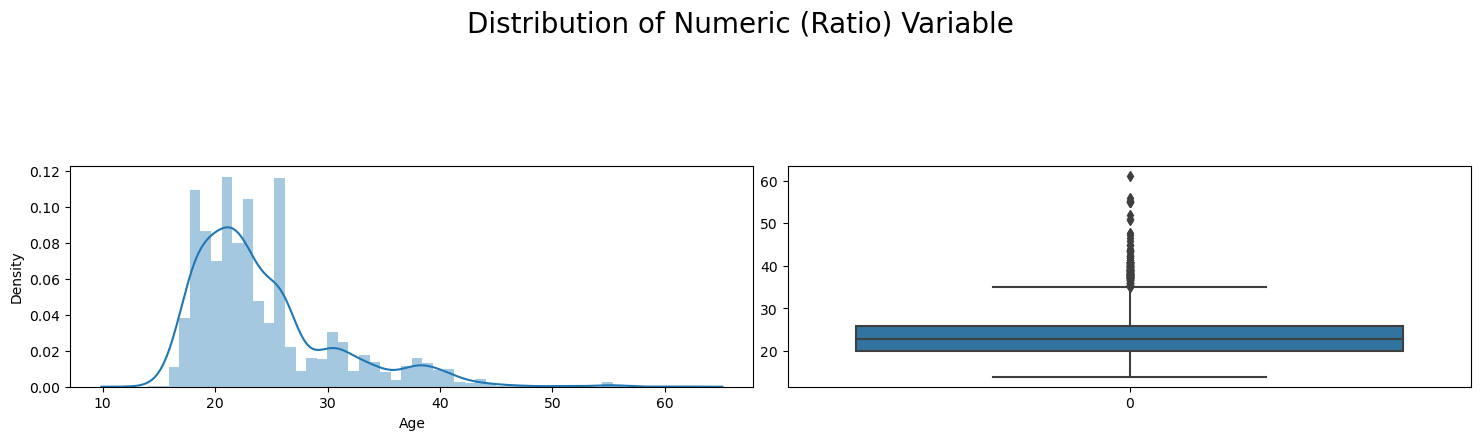

In [19]:
# ratio variable distribution 

fig = plt.figure(figsize = (16,5))

#distplot
ax1 = fig.add_subplot(121)
sns.distplot(df["Age"], kde=True)

#boxplot
ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(df.Age)

# show figure & plots
fig.suptitle("Distribution of Numeric (Ratio) Variable", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

C:\Users\kundan Gupta\AppData\Local\Temp\ipykernel_10304\2028145602.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
C:\Users\kundan Gupta\AppData\Local\Temp\ipykernel_10304\2028145602.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),
C:\Users\kundan Gupta\AppData\Local\Temp\ipykernel_10304\2028145602.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.NObeyesdad)


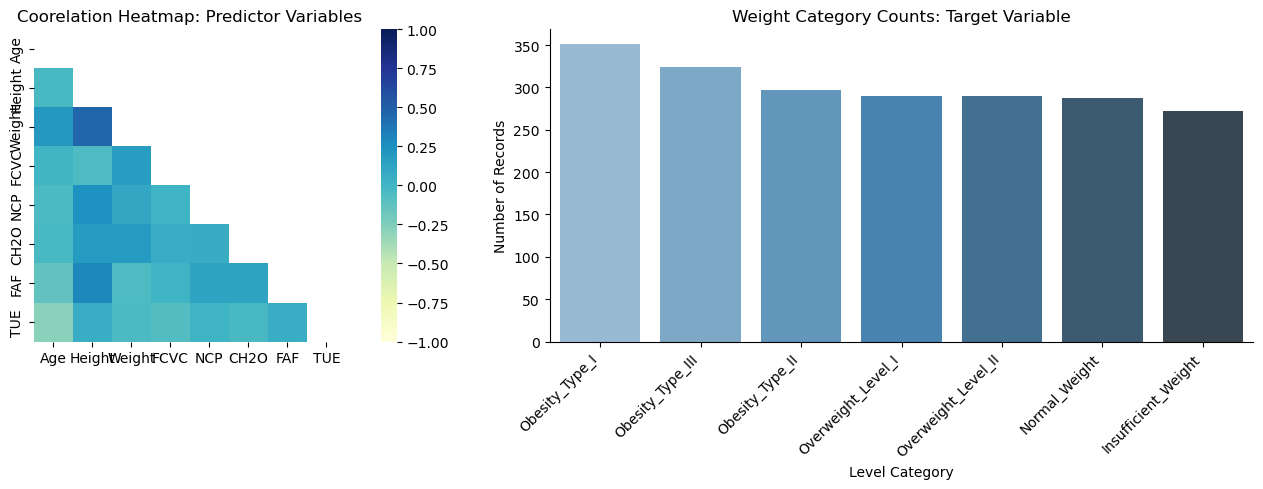

In [20]:
# create figure
fig = plt.figure(figsize=(15, 5))

# add subplot for one row 2 graphs first postion
ax1 = fig.add_subplot(121)

# correlation data matrix
matrix = np.triu(df.corr())

# set title 
ax1.title.set_text("Coorelation Heatmap: Predictor Variables")

#define plot
sns.heatmap(df.corr(), 
                 mask=matrix,
                 annot = False,                 
                 fmt='.1g', 
                 cmap="YlGnBu", 
                 vmin=-1, vmax=1, center= 0,                 
                 square="True",
                 ax=ax1)

# add second subplot
ax2 = fig.add_subplot(122)

# rotate axis label
ax2.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.NObeyesdad)

# Set title text
ax2.title.set_text("Weight Category Counts: Target Variable")

# define second plot
sns.countplot(x="NObeyesdad",                  
                 palette="Blues_d", 
                 order=df.NObeyesdad.value_counts().index,
                 ax = ax2,
                 data=df)

# labels for x and y
ax2.xaxis.label.set_text("Level Category")
ax2.yaxis.label.set_text("Number of Records")

# turn off top and right frame lines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# show figure & plots
plt.tight_layout()
plt.show()

In [21]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#print highly correlated variables
print("Number of variables with > 0.95 correlation: ", len(to_drop))

Number of variables with > 0.95 correlation:  0


C:\Users\kundan Gupta\AppData\Local\Temp\ipykernel_10304\1394047807.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
C:\Users\kundan Gupta\AppData\Local\Temp\ipykernel_10304\1394047807.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


## Performing encoding

In [33]:
# Checking unique values of categorical variables
# Author - Sai Dutt
cat_col = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for cat in cat_col:
  print(cat)
  print(df[cat].unique())
  print("\n")

Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


family_history_with_overweight
['yes', 'no']
Categories (2, object): ['no', 'yes']


FAVC
['no', 'yes']
Categories (2, object): ['no', 'yes']


CAEC
['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']


SMOKE
['no', 'yes']
Categories (2, object): ['no', 'yes']


SCC
['no', 'yes']
Categories (2, object): ['no', 'yes']


CALC
['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']


MTRANS
['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
Categories (5, object): ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']


NObeyesdad
['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_I

In [35]:
# Author - Sai Dutt
# Storing colum names in a list for later use
cols = []
for col in df.head(1) :  
  cols.append(col)

In [37]:
df['NObeyesdad'].unique()

['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

Thats a lot of categories. Let us encode them with numbers. Since, there is a natural heirarchy among the classes this makes sense.

In [38]:
df['NObeyesdad'] = df['NObeyesdad'].map({'Normal_Weight' : 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 1, 'Insufficient_Weight': 0, \
 'Obesity_Type_I' : 2  , 'Obesity_Type_II' : 2, \
 'Obesity_Type_III' : 2 })

We convert the categorical features into numerical data. Categories such as CAEC, CALC, family_history and MTRANS follow a set order so this makes sense. The rest are have two classes.

In [40]:
# Encoding the categories with numeric values
# Author - Sai Dutt

df['CAEC'] = df['CAEC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))
df['SMOKE'] = df['SMOKE'].apply(lambda x: ['yes', 'no'].index(x))
df['SCC'] = df['SCC'].apply(lambda x: ['yes', 'no'].index(x))
df['CALC'] = df['CALC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female': 1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no' : 0, 'yes': 1})
df['FAVC'] = df['FAVC'].map({'no' : 0, 'yes': 1})
df['MTRANS'] = df['MTRANS'].map({'Public_Transportation': 1, 'Walking':2, 'Automobile':3, 'Motorbike':4, 'Bike':5})
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2,3,1,1,2,1,0,1,0,1,0
1,1,21.0,1.52,56.0,1,0,3,3,1,0,3,0,3,0,1,1,0
2,0,23.0,1.80,77.0,1,0,2,3,1,1,2,1,2,1,2,1,0
3,0,27.0,1.80,87.0,0,0,3,3,1,1,2,1,2,0,2,2,1
4,0,22.0,1.78,89.8,0,0,2,1,1,1,2,1,0,0,1,1,1


## Splitting the data 

In [42]:
# split dataset in features and target variable

# Features
X = df.drop(columns=["NObeyesdad"])

# Target variable
y = df['NObeyesdad'] 

In [43]:
# import sklearn packages for data treatments
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")    

In [45]:
#run Decision Trees, Random Forest, KNN and SVM
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.96372
Accuracy w/Scaled Data (ss): 0.96372
Accuracy w/Scaled Data (mm): 0.96372

Classification Report (mm):
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       169
           1       0.94      0.93      0.94       174
           2       0.99      0.99      0.99       291

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.95741
Accuracy w/Scaled Data (ss): 0.95899
Accuracy w/Scaled Data (mm): 0.96215

Classification Report (mm):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       169
           1       0.95     

# Report

1. we are getting maximum accuracy with Random forest model.
2. next best model we are getting is Decision Tree

## Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))

In [47]:
#the KNN model performs better on the unscaled data this function
# function for unscaled data
#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=target_names))

## KNN

In [48]:
# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.95
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       169
           1       0.89      0.94      0.91       174
           2       0.97      0.99      0.98       291

    accuracy                           0.95       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.95      0.95      0.95       634



## Random Forest

In [50]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10, 200,10)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2, 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2, 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [1010]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              #'random_state': random_state,
              #'max_features':max_features,
              #'min_samples_split':min_samples_split             
               }


hyper_tune('Random Forest',
           RandomForestClassifier(), parameters)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
Accuracy Score = 0.97
{'criterion': 'entropy', 'max_depth': 40, 'n_estimators': 60}

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       169
           1       0.93      0.95      0.94       174
           2       1.00      0.99      0.99       291

    accuracy                           0.97       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.97      0.97      0.97       634



# Report

1. we are getting best model after applying hyperparameter tuning in Random Forest